# Problem: Hertzsprung-Russell Diagram (6 points)

In this problem, we will explore the so-called Hertzsprung-Russell Diagram which plots the logarithm of the absolute luminosities $\log L$ of stars against their visual color. Here, we will use the HYG database available [online](https://www.astronexus.com/downloads/catalogs/hygdata_v42.csv.gz).

(a) The logarithm of the absolute luminosity is given by $-0.4 M$ where $M$ is the absolute magnitude (column `absmag`). The luminosity is given in units of the absolute luminosity of the star Vega, $L_\mathrm{Vega}$. The color is given by the color index (column `ci`). Read in the data and remove all stars with invalid or missing entries for the absolute luminosity or the color. Additionally, remove stars with a color index greater than 2 which are mostly artifacts.

(b) Make a two-dimensional histogram $\log L$ vs. the color index. Use a logarithmic color scale for the counts.

(d) Calculate the Bayesian Information Criterion (BIC) for Gaussian Mixture Models (GMM). In all cases, fit the GMM to the distribution of $\log L$ and the color index. What is the ideal number of Gaussians in the GMM and why?

(d) As an alternative to the BIC, calculate the cross-validated per-sample average log-likelihood as a function of the number of components. Which model performs best, i.e., has the highest likelihood? Does your answer roughly agree with your answer in part (c)?

(e) Visualize your best-fitting GMM by showing the (logarith of the) density of the GMM in the $\log L$ vs. the color index plane.

## Cleaning Data

In [1]:
import math
import pandas as pd
from IPython.utils.PyColorize import linux_theme
from sklearn.utils.extmath import density

df = pd.read_csv("hygdata_v42.csv")
df = df.dropna(subset = ['absmag', 'ci'])
df = df[df['ci'] <= 2]

## Hertzsprung-Russell Dagram

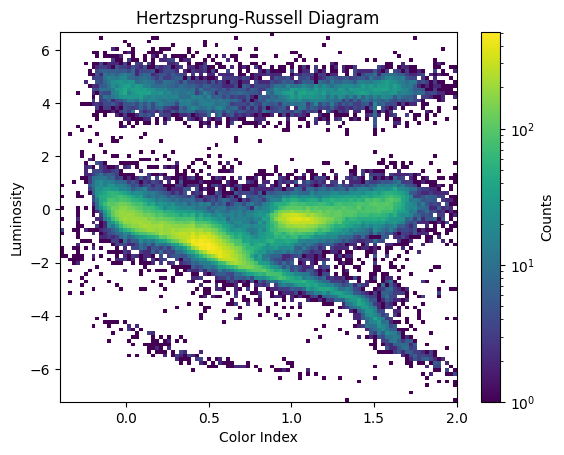

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


df = pd.read_csv("hygdata_v42.csv")
df = df.dropna(subset = ['absmag', 'ci'])
df = df[df['ci'] <= 2]

luminosity = -0.4 * df['absmag']
color = df['ci']

plt.title("Hertzsprung-Russell Diagram")
plt.hist2d(color, luminosity, norm = LogNorm(), bins=(100, 100))
plt.colorbar(label = 'Counts')
plt.ylabel('Luminosity')
plt.xlabel('Color Index')
plt.show()

## BIC Graph

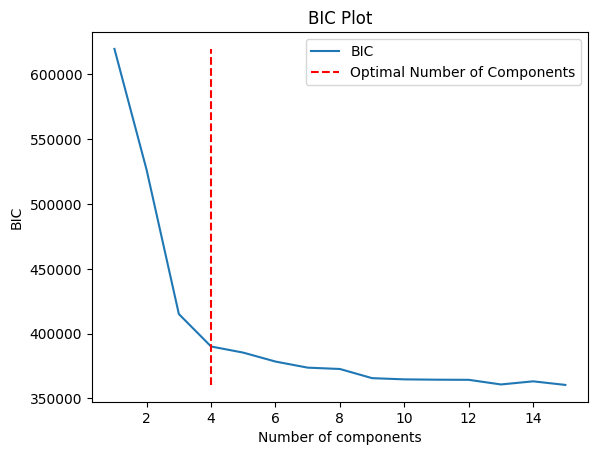

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

df = pd.read_csv("hygdata_v42.csv")
df = df.dropna(subset = ['absmag', 'ci'])
df = df[df['ci'] <= 2]

luminosity = -0.4 * df['absmag']
color = df['ci']
X = pd.DataFrame({'absmag': luminosity, 'ci': color})

n_components = range(1, 16)
bic = []
for n in n_components:
    gmm = GaussianMixture(n_components = n).fit(X)
    bic.append(gmm.bic(X))

plt.plot(n_components, bic, label = 'BIC')
plt.title("BIC Plot")
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.vlines(4, min(bic), max(bic), colors='red', linestyles='dashed', label = "Optimal Number of Components")
plt.legend()
plt.show()

## Log Likelihood

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score, KFold

df = pd.read_csv("hygdata_v42.csv")
df = df.dropna(subset = ['absmag', 'ci'])
df = df[df['ci'] <= 2]

luminosity = -0.4 * df['absmag']
color = df['ci']
X = pd.DataFrame({'absmag': luminosity, 'ci': color})

n_components = range(1, 16)
likelihood = []

for n in n_components:
    kf = KFold(n_splits = 10, shuffle = True)
    gmm = GaussianMixture(n_components = n).fit(X)
    score = cross_val_score(gmm, X, cv = kf)
    likelihood.append(np.mean(gmm.score(X)))

plt.plot(n_components, likelihood, label = 'Likelihood')
plt.title("Log Likelihood Plot")
plt.xlabel("Number of components")
plt.ylabel("Log Likelihood")
plt.vlines(4, min(likelihood), max(likelihood), colors='red', linestyles='dashed', label = "Optimal Number of Components")
plt.legend()
plt.show()

 ## Best Fitting GMM

/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


'\nplt.pcolormesh(x, y, density, norm = LogNorm())\nplt.colorbar(label = \'Density (Log Likelihood)\')\nplt.title("HR Log Likelihood")\nplt.xlabel("Color Index")\nplt.ylabel("Luminosity")'

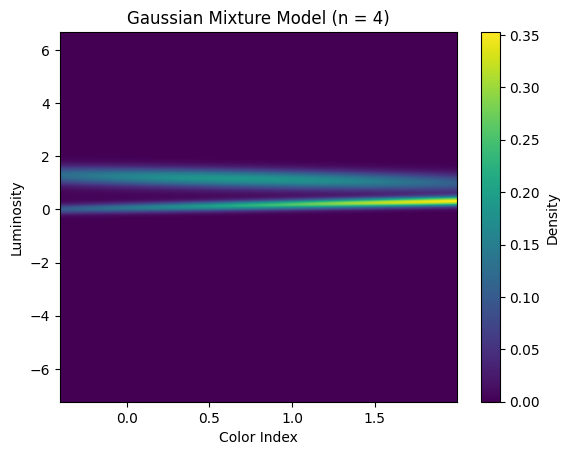

In [4]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import cross_val_score, KFold
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable


df = pd.read_csv("hygdata_v42.csv")
df = df.dropna(subset = ['absmag', 'ci'])
df = df[['absmag', 'ci']]
df = df[df['ci'] <= 2]

luminosity = -0.4 * df['absmag'].to_numpy()
color = df['ci'].to_numpy()

gmm = GaussianMixture(n_components = 4).fit(df)
x, y = np.mgrid[min(color):max(color):.01, min(luminosity):max(luminosity):.01]
X = np.column_stack([x.ravel(), y.ravel()])
data = np.exp(gmm.score_samples(X).reshape(x.shape))
plt.pcolormesh(x, y, data, cmap='viridis')
plt.colorbar(label = 'Density')
plt.title("Gaussian Mixture Model (n = 4)")
plt.xlabel("Color Index")
plt.ylabel("Luminosity")



'''density = gmm.score_samples(df)
df = pd.DataFrame({'luminosity': luminosity, 'color': color, 'density': density})
grid = df.pivot_table(index='luminosity', columns='color', values='density', aggfunc='sum', dropna=True)
print(grid.shape)
#display(grid)

plt.pcolormesh(grid.columns.values, grid.index.values, grid.values, shading='auto')
plt.colorbar(label = 'Density')
plt.xlabel('Color')
plt.ylabel('Luminosity')'''
'''
plt.pcolormesh(x, y, density, norm = LogNorm())
plt.colorbar(label = 'Density (Log Likelihood)')
plt.title("HR Log Likelihood")
plt.xlabel("Color Index")
plt.ylabel("Luminosity")'''